In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from fado.preprocessing import MetricOptimizer

## 1. Load Dataset

This code loads the popular iris dataset from a remote location on GitHub using pandas. The dataset contains measurements of the sepal length, sepal width, petal length, and petal width of three species of iris flowers: setosa, versicolor, and virginica.

We use label encoding by scikit-learn's LabelEncoder class to convert the non-numeric species column into numeric labels. This transformation is stored in a new variable called 'iris_transform'.

After that, the code changes the 'species' column to a binary format, where '0' represents setosa and '1' represents versicolor and virginica. Species represent the protected attribute which corresponds to race, nationality, and gender as available in many real world datasets.

We use the 'petal_length' column as the label, we is binarized where values greater than 9 are assigned '1' and values less than or equal to 9 are assigned '0'.

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# encode non-numeric columns to labels
le = LabelEncoder()
iris_transform = iris.apply(le.fit_transform)

# make species binary
iris_transform['species'] = iris_transform['species'] == 0

# make label
iris_transform['petal_length'] = iris_transform['petal_length'] > 9

In [3]:
iris_transform.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,False,1,True
1,6,9,False,1,True
2,4,11,False,1,True
3,3,10,False,1,True
4,7,15,False,1,True


## 2. Data Removal

In [4]:
# Initialize MetricOptimizer
# Keep 75\% of the whole dataset
preproc = MetricOptimizer(frac=0.75,
                          protected_attribute='species',
                          label='petal_length')

In [5]:
# Create pre-processing instance
preproc = preproc.fit(iris_transform)
# Remove samples to yield a fair dataset
iris_fair = preproc.transform()

### 2.1 Compare Fairness/Discrimination

In [6]:
from fado.metrics import statistical_parity_absolute_difference

In [7]:
discrimination_fair = statistical_parity_absolute_difference(iris_fair['petal_length'], iris_fair['species'])
discrimination_orig = statistical_parity_absolute_difference(iris_transform['petal_length'], iris_transform['species'])

In [8]:
print(f'The original dataset has a statistical disparity (absolute) value of: {discrimination_orig}')
print(f'The pre-processed fair dataset has a statistical disparity (absolute) value of: {discrimination_fair}')
print('(Lower is better.)')

The original dataset has a statistical disparity (absolute) value of: 0.99
The pre-processed fair dataset has a statistical disparity (absolute) value of: 0.9841269841269841
(Lower is better.)


## 3. Synthetic Fair Data Generation

In [9]:
# Initialize MetricOptimizer
# Double the dataset
preproc = MetricOptimizer(frac=2,
                          protected_attribute='species',
                          label='petal_length')

In [10]:
# Create pre-processing instance
preproc = preproc.fit(iris_transform)
# Remove samples to yield a fair dataset
iris_fair = preproc.transform()

### 3.1 Compare Correlation Matrices

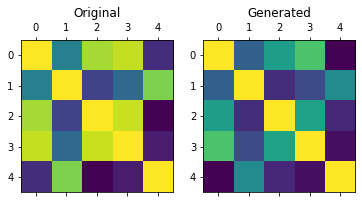

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(iris_transform.corr())
ax1.title.set_text("Original")

ax2.matshow(iris_fair.iloc[-150::].corr())
ax2.title.set_text("Generated")

In [12]:
np.linalg.norm(iris_transform.corr() - iris_fair.iloc[-150::].corr())

1.8364899366170444

### 3.2 Compare Fairness/Discrimination of Generated Data (includes original)

In [13]:
discrimination_fair = statistical_parity_absolute_difference(iris_fair['petal_length'], iris_fair['species'])
discrimination_orig = statistical_parity_absolute_difference(iris_transform['petal_length'], iris_transform['species'])

In [14]:
print(f'The original dataset has a statistical disparity (absolute) value of: {discrimination_orig}')
print(f'The pre-processed fair dataset has a statistical disparity (absolute) value of: {discrimination_fair}')
print('(Lower is better.)')

The original dataset has a statistical disparity (absolute) value of: 0.99
The pre-processed fair dataset has a statistical disparity (absolute) value of: 0.7022222222222222
(Lower is better.)
